# Web Scraping flipkart.com
This is the Flipkart website comprising of different laptops. This page contains the details of 24 laptops. So now looking at this, we try to extract the different features of the laptops such as the description of the laptop (model name along with the specification of the laptop), Name of the Processor, Type of Processor, RAM, Operating System, Disk Drive Storage, Display, Warranty, Ratings, and Price. So we extract the data from 7 pages so our dataset consists of information the 168 distinct laptops.<br>
Link to my article: https://towardsdatascience.com/learn-web-scraping-in-15-minutes-27e5ebb1c28e

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_merged.csv')

In [3]:
df.shape

(168, 21)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(168, 20)

In [8]:
df.head()

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,RAM_GB,DDR_Version,Processor Name,Processor Type,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen
0,HP Spectre x360 Core i5 10th Gen - (8 GB/512 G...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,"₹1,02,990",8,4,Intel,i5,10,Windows,512,SSD,13.3,HP,No,Yes
1,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,"₹55,990",8,4,Intel,i5,8,Windows,512,SSD,14.0,Asus,Yes,No
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),"₹56,990",8,4,Intel,i5,9,Windows,512,SSD,15.6,Acer,Yes,No
3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,"₹42,990",8,4,AMD,Ryzen 5,2,Windows,512,SSD,14.0,Asus,No,No
4,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹52,990",8,4,Intel,i5,10,Windows,512,SSD,14.0,HP,No,No


In [9]:
df.dtypes # Checking the datatypes

Description               object
Processor                 object
RAM                       object
Operating System          object
Storage                   object
Display                   object
Warranty                  object
Price                     object
RAM_GB                     int64
DDR_Version               object
Processor Name            object
Processor Type            object
Generation                object
Operating System Type     object
Storage_GB                object
Disk Drive                object
Size(Inches)             float64
Company                   object
Graphic Card              object
Touchscreen               object
dtype: object

In [10]:
df['RAM_GB'].unique()
df['DDR_Version'].unique()
df['Generation'].unique()
#df['Storage_GB'].unique()

array(['10', '8', '9', '2', 'Not Mentioned', '3', '5', '7'], dtype=object)

In [11]:
df['DDR_Version']=df['DDR_Version'].apply(lambda x:x.replace('Not Mentioned','0')) # Replacing 'Not Mentioned' with 0
df['Generation']=df['Generation'].apply(lambda x:x.replace('Not Mentioned','0'))

In [12]:
df['DDR_Version'].unique()

array(['4', '3', '0'], dtype=object)

In [13]:
df['Generation'].unique()

array(['10', '8', '9', '2', '0', '3', '5', '7'], dtype=object)

In [14]:
df['Storage'].unique()

array(['512 GB SSD', '1 TB HDD|256 GB SSD', '1 TB SSD', '256 GB SSD',
       '1 TB HDD|512 GB SSD', '1 TB HDD', '1 TB HDD|128 GB SSD',
       '128 GB SSD', '2 TB HDD|256 GB SSD',
       'HP Audio Switch, HP Support Assistant, HP Documentation, HP Jumpstart, HP BIOS Recovery, HP Connection Optimizer, HP 3D DriveGuard (HDD Only), Dropbox',
       '512 GB SSD for Reduced Boot Up Time and in Game Loading',
       '1 TB HDD|1 TB SSD', '2 TB HDD'], dtype=object)

In [15]:
df['Storage']=df['Storage'].apply(lambda x:x.replace('HP Audio Switch, HP Support Assistant, HP Documentation, HP Jumpstart, HP BIOS Recovery, HP Connection Optimizer, HP 3D DriveGuard (HDD Only), Dropbox','1 TB HDD'))
# As they have not mentioned anything about the storage capacity and have mentioned HDD only so we assume the storage as 1 TB HDD

In [16]:
df['Storage']=df['Storage'].apply(lambda x:x.replace('512 GB SSD for Reduced Boot Up Time and in Game Loading','512 GB SSD'))
# Here its clearly mentioned as 512 GB SSD so we remove the extra part which is Reduced Boot UPp Time...

In [17]:
df['Storage'].unique()

array(['512 GB SSD', '1 TB HDD|256 GB SSD', '1 TB SSD', '256 GB SSD',
       '1 TB HDD|512 GB SSD', '1 TB HDD', '1 TB HDD|128 GB SSD',
       '128 GB SSD', '2 TB HDD|256 GB SSD', '1 TB HDD|1 TB SSD',
       '2 TB HDD'], dtype=object)

In [19]:
print(df['Processor Name'].unique())
print(df['Processor Type'].unique())
print(df['Operating System Type'].unique())

['Intel' 'AMD' 'Microsoft']
['i5' 'Ryzen 5' 'i7' 'i3' 'Ryzen 7' 'Ryzen 3' 'SQ1' 'APU' 'Pentium' 'm3'
 'i9' 'Athlon']
['Windows' 'Mac' 'DOS' 'Linux']


In [20]:
cat_to_num = ['DDR_Version','Generation'] 
df[cat_to_num] = df[cat_to_num].apply(pd.to_numeric,errors='coerce') # Converting the categorical variables to numerical variables


In [21]:
df.dtypes # We can see that the datatypes of these columns have changed to int64

Description               object
Processor                 object
RAM                       object
Operating System          object
Storage                   object
Display                   object
Warranty                  object
Price                     object
RAM_GB                     int64
DDR_Version                int64
Processor Name            object
Processor Type            object
Generation                 int64
Operating System Type     object
Storage_GB                object
Disk Drive                object
Size(Inches)             float64
Company                   object
Graphic Card              object
Touchscreen               object
dtype: object

In [22]:
df['Price'].unique()

array(['₹1,02,990', '₹55,990', '₹56,990', '₹42,990', '₹52,990', '₹59,990',
       '₹64,990', '₹94,990', '₹75,990', '₹53,990', '₹50,990', '₹84,990',
       '₹54,990', '₹47,990', '₹46,990', '₹63,990', '₹60,990', '₹65,990',
       '₹85,990', '₹52,490', '₹78,990', '₹89,990', '₹73,990', '₹1,74,900',
       '₹61,990', '₹82,990', '₹59,437', '₹44,760', '₹99,990', '₹45,990',
       '₹51,990', '₹33,250', '₹74,397', '₹96,657', '₹72,990', '₹96,990',
       '₹29,990', '₹41,990', '₹1,99,900', '₹57,990', '₹1,94,900',
       '₹37,990', '₹1,75,200', '₹49,990', '₹69,990', '₹43,990', '₹74,910',
       '₹37,690', '₹26,990', '₹27,420', '₹40,990', '₹53,859', '₹48,240',
       '₹1,12,990', '₹2,44,191', '₹34,490', '₹32,990', '₹83,458',
       '₹46,850', '₹2,39,900', '₹81,351', '₹55,139', '₹1,89,990',
       '₹38,599', '₹93,999', '₹35,990', '₹39,990', '₹25,990', '₹71,990',
       '₹70,990', '₹65,490', '₹97,990', '₹1,64,999', '₹1,49,990',
       '₹2,97,990', '₹95,695', '₹98,890', '₹1,48,999', '₹1,79,990',
     

In [23]:
df['Price'].isnull().sum()

0

In [25]:
prices = []
for i in df['Price']:
  i = i.replace('₹','')
  i = i.replace(',','')
  i = float(i)
  prices.append(i)

In [26]:
df['Price'] = prices

In [27]:
df

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,RAM_GB,DDR_Version,Processor Name,Processor Type,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen
0,HP Spectre x360 Core i5 10th Gen - (8 GB/512 G...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,102990.0,8,4,Intel,i5,10,Windows,512,SSD,13.3,HP,No,Yes
1,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,55990.0,8,4,Intel,i5,8,Windows,512,SSD,14.0,Asus,Yes,No
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),56990.0,8,4,Intel,i5,9,Windows,512,SSD,15.6,Acer,Yes,No
3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,42990.0,8,4,AMD,Ryzen 5,2,Windows,512,SSD,14.0,Asus,No,No
4,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52990.0,8,4,Intel,i5,10,Windows,512,SSD,14.0,HP,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Lenovo Ideapad Slim APU Dual Core A4 - (4 GB/6...,AMD APU Dual Core A4 Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,128 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,20990.0,4,4,AMD,APU,0,Windows,128,SSD,14.0,Lenovo,No,No
164,Acer Predator Triton 300 Core i7 9th Gen - (8 ...,Intel Core i7 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,2 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),97990.0,8,4,Intel,i7,9,Windows,2000+256,Both,15.6,Acer,Yes,No
165,Lenovo Yoga 730 Core i5 8th Gen - (8 GB/512 GB...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,94990.0,8,4,Intel,i5,8,Windows,512,SSD,13.3,Lenovo,No,Yes
166,Asus ZenBook Core i7 10th Gen - (16 GB/1 TB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,99990.0,16,4,Intel,i7,10,Windows,1000,SSD,13.3,Asus,No,No


In [28]:
df.to_csv('changed.csv') # Save it into a CSV file

# Exploratory Data Analysis

In [29]:
df = pd.read_csv('/content/changed.csv')

In [30]:
df.shape

(168, 21)

In [31]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(168, 20)

In [32]:
df.head()

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,RAM_GB,DDR_Version,Processor Name,Processor Type,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen
0,HP Spectre x360 Core i5 10th Gen - (8 GB/512 G...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,102990.0,8,4,Intel,i5,10,Windows,512,SSD,13.3,HP,No,Yes
1,Asus VivoBook 14 Core i5 8th Gen - (8 GB/512 G...,Intel Core i5 Processor (8th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,55990.0,8,4,Intel,i5,8,Windows,512,SSD,14.0,Asus,Yes,No
2,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),56990.0,8,4,Intel,i5,9,Windows,512,SSD,15.6,Acer,Yes,No
3,Asus VivoBook 14 Ryzen 5 Quad Core 2nd Gen - (...,AMD Ryzen 5 Quad Core Processor (2nd Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Limited International Hardware Warranty,42990.0,8,4,AMD,Ryzen 5,2,Windows,512,SSD,14.0,Asus,No,No
4,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,52990.0,8,4,Intel,i5,10,Windows,512,SSD,14.0,HP,No,No


In [33]:
df.columns

Index(['Description', 'Processor', 'RAM', 'Operating System', 'Storage',
       'Display', 'Warranty', 'Price', 'RAM_GB', 'DDR_Version',
       'Processor Name', 'Processor Type', 'Generation',
       'Operating System Type', 'Storage_GB', 'Disk Drive', 'Size(Inches)',
       'Company', 'Graphic Card', 'Touchscreen'],
      dtype='object')

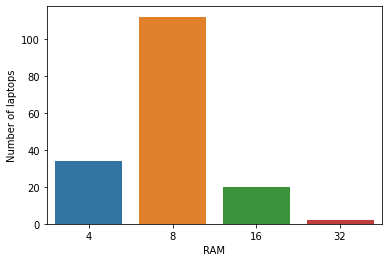

In [34]:
sns.countplot(x='RAM_GB',data=df)

plt.xlabel('RAM') 
plt.ylabel('Number of laptops') 

plt.show()

We can see that the maximum number of laptops have 8GB of RAM(above 100) and 4GB RAM will be fine for school purpose. 8GB RAM is optimal since its sufficient for college purpose and for normal games. Very few laptops have 32GB RAM. But if there are professional gamers then they prefer 16/32GB RAM laptops. Its obvious that as the size of the RAM increases, so does the price. Laptops with a higher RAM size are costly. But lets verify it now! 

In [35]:
df.groupby('RAM_GB')['Price'].mean()

RAM_GB
4      39080.058824
8      68139.419643
16    164398.950000
32    271090.500000
Name: Price, dtype: float64

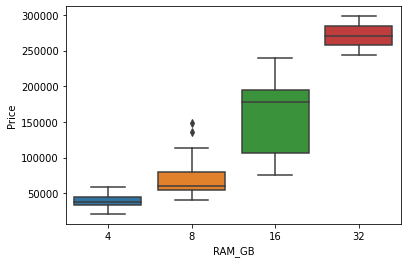

In [36]:
sns.boxplot(x='RAM_GB',y="Price",data=df)
plt.show()

So its evident that as the size of the RAM increases, the Price of the laptop also increases. There are even a few outliers for 8 GB RAM which indicates that even though RAM is 8GB the Price is very high.So the other features of the laptop might be excellent. But what can the other features be which makes it so expensive? Let's find out

In [37]:
df[df['RAM_GB']==8]['Price'].idxmax() # The index of the laptop with maximum price(8GB RAM)

145

In [38]:
df.iloc[145,7] # The maximum price for a 8GB laptop is 1,49,000


148999.0

In [39]:
df.iloc[145,:] # Checking all the features of that laptop

Description              Apple MacBook Pro Core i5 8th Gen - (8 GB/256 ...
Processor                                Intel Core i5 Processor (8th Gen)
RAM                                                          8 GB DDR3 RAM
Operating System                                   Mac OS Operating System
Storage                                                         256 GB SSD
Display                                       33.78 cm (13.3 inch) Display
Warranty                                            1 Year Onsite Warranty
Price                                                               148999
RAM_GB                                                                   8
DDR_Version                                                              3
Processor Name                                                       Intel
Processor Type                                                          i5
Generation                                                               8
Operating System Type    

So now we can understand the reason behind this Price. In general Apple Macbooks are very much expensive when compared to Windows/Linux laptops. Here the Macbook is of Intel i5 8th gen 256GB SSD which is pretty good for a Macbook! So that's the reason for a very high price of a 8GB RAM laptop.If it's a Windows one then the price won't be this high(given the same configurations of the processor,generation)

In [41]:
df.groupby('RAM_GB')['Price'].mean()

RAM_GB
4      39080.058824
8      68139.419643
16    164398.950000
32    271090.500000
Name: Price, dtype: float64

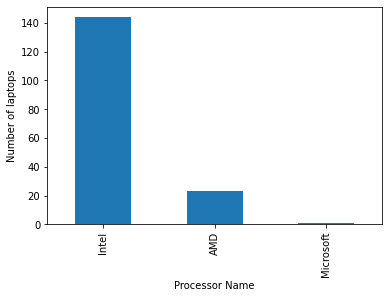

In [42]:
df['Processor Name'].value_counts().plot(kind='bar')

plt.xlabel('Processor Name')
plt.ylabel('Number of laptops')
plt.show()

In [43]:
a=df['Processor Name'].unique()
b=np.array(df['Processor Name'].value_counts())
b

array([144,  23,   1])

In [44]:
pd.pivot_table(df,index='Processor Name',values='Price')

,Price
Processor Name,
AMD,53607.695652
Intel,79589.326389
Microsoft,96657.000000


In [45]:
grouped = df.groupby(['Processor Name','Processor Type'])
grouped.size()

Processor Name  Processor Type
AMD             APU                4
                Athlon             1
                Ryzen 3            2
                Ryzen 5           13
                Ryzen 7            3
Intel           Pentium            4
                i3                24
                i5                79
                i7                32
                i9                 4
                m3                 1
Microsoft       SQ1                1
dtype: int64

Intel and AMD processors also have different type of CPUs and these inturn have different gens. Intel has i3,i5,i7,i9,Pentium CPUs and AMD has Ryzen3,Ryzen5,Ryzen7 CPUs. Core i7 CPUs are better than most Core i5 CPUs, which are in turn better than most Core i3 CPUs which are in turn better than Pentium CPU. They are just names to indicate the relative performance. Core i3 series has only dual-core processors, while the Core i5 and Core i7 series have both dual-core and quad-core processors. Quad-cores are usually better than dual-cores. In general i7 CPUs are expensive than i5 CPUs which are in turn expensive than i3 CPUs. As we go from i3 to i5 to i7 to i9 the performance,speed,price keeps increasing. Similar is the case with AMD Ryzen versions(Ryzen 7 > Ryzen 5 > Ryzen3) <br>
So here most of the laptops have Intel processors and most of these Intel processors have i5 CPUs.



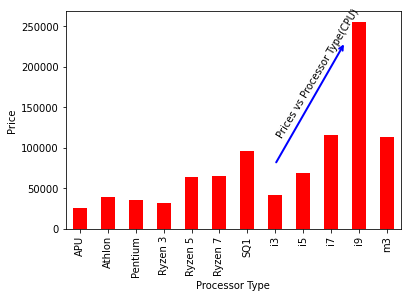

In [46]:
df.groupby('Processor Type')['Price'].mean().plot(kind='bar',color='red')
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(9.5, 230000),        # place head of the arrow at point (between i7 and i9 , Price 230000)
             xytext=(7,80000),        # place base of the arrow at point (top of i3 , Price 80000)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Prices vs Processor Type(CPU)',   # text to display
             xy=(7,110000),                     # start the text at at point (on top of i3 , Price 110000)
             rotation=59,                       # based on trial and error to match the arrow
             va='bottom',                       # want the text to be vertically 'bottom' aligned
             ha='left',                         # want the text to be horizontally 'left' algned.
            )
plt.ylabel('Price')
plt.show()

In [47]:
df['Generation'].unique() # Here 0 represents Not Mentioned(The CPU's generation is not mentioned)
# For example in the Processor column,its mentioned AMD Ryzen 5 Quad Core Processor-so here the company and CPU is mentioned but the generation is not mentioned

array([10,  8,  9,  2,  0,  3,  5,  7])

We have seen that i7 > i5 > i3 but here even there is one more distinguishing factor which is the generation of the CPU. In general, in terms of speed and performance 10th gen > 9th gen > 8th gen laptops(given the same CPU configuration). For example, if we wish to compare 2 laptops in terms of speed and perforamnce then we need to look at the type of processors. If both of them are Intel then we need to look at the CPU(if its i7/i5/i3).If both the CPUs are same then we need to go for the generation.If both the generations are same(Intel Core i5 9th gen,Intel Core i5 9th gen) then we need to look at the other specifications of the laptop. <br>
So here most of the laptops have CPUs which are of 10th generation. Price of a laptop is determined by all the features/specifications.

In [48]:
pro_with_gen = pd.crosstab(index=df["Generation"],columns=df["Processor Type"])
pro_with_gen

Processor Type,APU,Athlon,Pentium,Ryzen 3,Ryzen 5,Ryzen 7,SQ1,i3,i5,i7,i9,m3
Generation,,,,,,,,,,,,
0,4,1,4,2,11,2,1,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,3,2,2,0,1
8,0,0,0,0,0,0,0,6,35,11,1,0
9,0,0,0,0,0,0,0,0,7,9,3,0
10,0,0,0,0,0,0,0,15,33,10,0,0


In [49]:
df['Operating System Type'].value_counts()

Windows    154
Mac         10
DOS          3
Linux        1
Name: Operating System Type, dtype: int64

Almost 90% of the laptops use Windows as the main Operating System.Very few laptops use DOS and Linux. Even Mac is very famous but majority of them use Windows. Laptops can also be dual booted(can have more than 2 OS). For example, one laptop can have Windows as well as Linux(this is not supported by Mac) but here we deal with only one OS.

In [50]:
pd.pivot_table(df,index='Operating System Type',values='Price')

,Price
Operating System Type,
DOS,46412.333333
Linux,43990.000000
Mac,181077.600000
Windows,70107.103896


We can clearly see that the price of Macbook is very high. We have already seen this before(even though many other laptops had 8GB RAM, but particularly the price of Mac with 8GB was very high)

In [51]:
pd.pivot_table(df, index = ['RAM_GB','Operating System Type'], values = 'Price').sort_values('RAM_GB', ascending = False)

Price
RAM_GB Operating System Type               
32     Windows                271090.500000
16     Mac                    210627.142857
       Windows                139506.846154
8      DOS                     79257.000000
       Linux                   43990.000000
       Mac                    112128.666667
       Windows                 67027.869159
4      DOS                     29990.000000
       Windows                 39648.187500

We have already seen that even though its 8GB RAM, the price for Mac was very high.From this table its evident that Mac is very expensive compared to Windows(the price of the laptop depends on many other features as well).The Price column shows us the average price for all the categories.

In [52]:
df['Disk Drive'].value_counts()

SSD     88
Both    46
HDD     34
Name: Disk Drive, dtype: int64

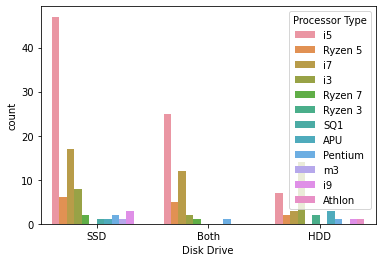

In [53]:
sns.countplot(x="Disk Drive", hue="Processor Type", data=df)

In [54]:
df['Company'].value_counts()

Asus         45
HP           37
Lenovo       26
Acer         22
Apple         9
Dell          8
Microsoft     8
MSI           6
Alienware     4
Avita         1
MarQ          1
Nexstgo       1
Name: Company, dtype: int64

So the maximum number of laptops are of Asus. We have already seen that the price of Apple Macbook is very high but let's see if there is any other company which beats Apple in terms of price.

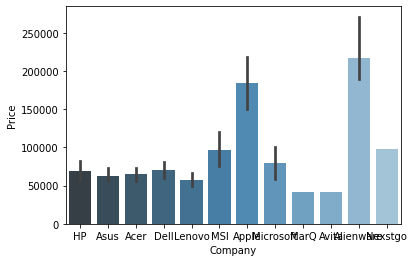

In [55]:
sns.barplot("Company", y="Price", data=df,
                 palette="Blues_d")

There are only 4 Alienware laptops but the price is very costly and this beats Apple mac as well. They are the most expensive among all the companies. After Alienware it's again Apple.

Previously I just stated that i9 processors are expensive than i7 which in turn as expensive than i5 and i3. But is that true? 

In [56]:
pd.pivot_table(df, index = ['Company','Processor Type'], values = 'Price').sort_values('Company', ascending = False)

Price
Company   Processor Type               
Nexstgo   i5               97990.000000
Microsoft i7              135990.000000
          i5               96657.000000
          SQ1              96657.000000
          Ryzen 5          93999.000000
          Pentium          38599.000000
MarQ      i5               41990.000000
MSI       i7              103743.400000
          i5               60990.000000
Lenovo    i3               37490.000000
          APU              20990.000000
          i7               82931.000000
          i5               67756.600000
HP        i7              148294.750000
          i5               74169.214286
          i3               42320.000000
          Ryzen 7          57990.000000
          Ryzen 5          59990.000000
          Ryzen 3          31620.000000
          APU              25990.000000
Dell      i7               89240.000000
          i5               61669.000000
          Ryzen 5          74990.000000
          i3               59437.000000
Avita     i5               41990.000000
Asus      Ryzen 5          45490.000000
          i9              244191.000000
          i7               85062.200000
          i5               59149.000000
          i3               43990.000000
          Ryzen 7          74910.000000
          APU              26990.000000
Apple     i7              214945.000000
          i5              159774.250000
          m3              112990.000000
          i9              239900.000000
Alienware i9              297990.000000
          i7              189990.000000
Acer      i3               43410.500000
          Ryzen 7          61990.000000
          Pentium          27420.000000
          i5               62698.333333
          i7               90990.000000
          Athlon           39999.000000

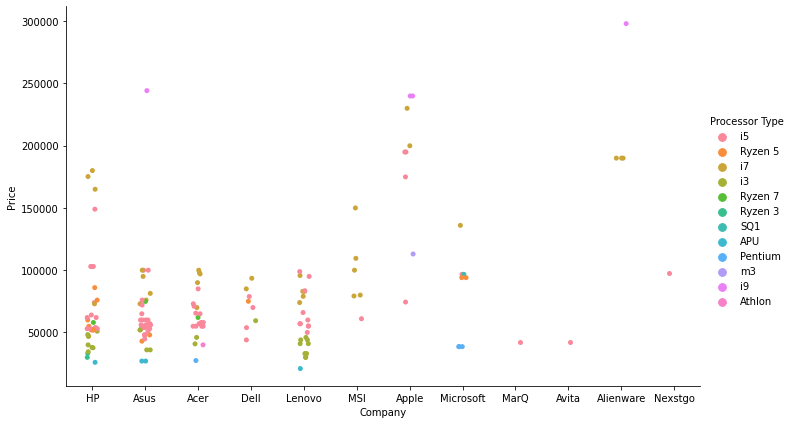

In [57]:
sns.catplot(x="Company", y="Price", hue="Processor Type", data=df,height=6, aspect=10/6)


So from the table and the plot it is noticeable that the i9 processors are the most expensive, and then comes i7. For every company i9 laptops are costlier than i7 and i7 costlier than i5. There might be a few cases where i5 price > i7 price(this totally depends on the generation and other specifications such as RAM,SSD/HDD etc)  

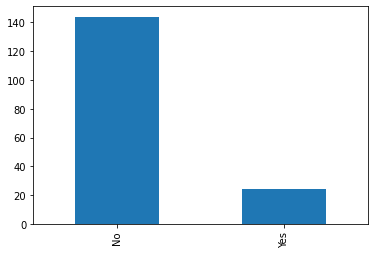

In [58]:
df['Touchscreen'].value_counts().plot(kind='bar')

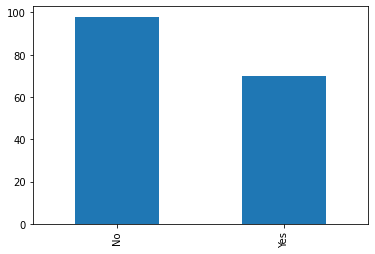

In [59]:
df['Graphic Card'].value_counts().plot(kind='bar')


Most of the laptops do not have the touchscreen facility. Most of the laptops do not have graphic card which is actually bad because 2GB Graphic card is a must these days even for basic purposes.

# Data Modeling using pycaret

In [62]:
df.drop(['Description','Processor','RAM','Operating System','Storage','Display','Warranty'],axis=1,inplace=True)
# Dropping the unnecessary columns(as I already created the new features I am dropping the old features)

In [63]:
df.columns

Index(['Price', 'RAM_GB', 'DDR_Version', 'Processor Name', 'Processor Type',
       'Generation', 'Operating System Type', 'Storage_GB', 'Disk Drive',
       'Size(Inches)', 'Company', 'Graphic Card', 'Touchscreen'],
      dtype='object')

In [64]:
df.head()

,Price,RAM_GB,DDR_Version,Processor Name,Processor Type,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen
0,102990.0,8,4,Intel,i5,10,Windows,512,SSD,13.3,HP,No,Yes
1,55990.0,8,4,Intel,i5,8,Windows,512,SSD,14.0,Asus,Yes,No
2,56990.0,8,4,Intel,i5,9,Windows,512,SSD,15.6,Acer,Yes,No
3,42990.0,8,4,AMD,Ryzen 5,2,Windows,512,SSD,14.0,Asus,No,No
4,52990.0,8,4,Intel,i5,10,Windows,512,SSD,14.0,HP,No,No


In [65]:
X = df.drop('Price',axis=1)
Y = df['Price']

In [66]:
Y = pd.DataFrame(Y)

In [69]:
!pip install pycaret==2.0

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 6.8MB 8.6MB/s 
     |████████████████████████████████| 266kB 32.1MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 12.4MB 44.0MB/s 
     |████████████████████████████████| 1.2MB 42.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 266kB 39.5MB/s 
     |████████████████████████████████| 65.9MB 65kB/s 
     |████████████████████████████████| 1.6MB 27.5MB/s 
     |████████████████████████████████| 2.1MB 34.1MB/s 
     |████████████████████████████████| 6.0MB 41.3MB/s 
     |████████████████████████████████| 1.1MB 36.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 286kB 40.2MB/s 
     |████████████████████████████████| 1

In [70]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [72]:
from pycaret.regression import *
reg = setup(data = df, target = 'Price') # setup variable,in the target we mention the feature name(dependent variable)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,8764
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(168, 13)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [95]:
compare_models()
# Training all the regression models
# So after this we can create any model-either CatBoost or else ExtraTrees regressor model and then we can perform hyperparameter tuning

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,11961.3018,328819727.4239,17364.9913,0.8212,0.2168,0.1795,0.0498
1,Extreme Gradient Boosting,12912.5140,402278056.2122,19238.1826,0.7991,0.2282,0.1919,0.0314
2,Extra Trees Regressor,12650.8383,374687481.0092,18926.3096,0.7930,0.2349,0.1781,0.2511
3,Orthogonal Matching Pursuit,14535.1839,422722419.9451,19771.0303,0.7910,0.2344,0.2006,0.0072
4,Random Forest,13984.5311,526105228.5071,21278.6205,0.7820,0.2188,0.1798,0.2512
5,Decision Tree,13223.6106,410748031.9970,19785.5038,0.7780,0.2428,0.1837,0.0083
6,Lasso Least Angle Regression,13435.1679,421678371.5986,19683.9893,0.7573,0.2411,0.2014,0.0176
7,CatBoost Regressor,13763.4983,573344823.9598,22503.4044,0.7533,0.2330,0.1802,1.2822
8,Ridge Regression,14242.9301,488471814.3092,20759.9779,0.7402,0.2532,0.2024,0.0066
9,Huber Regressor,14526.2642,646322901.0434,22251.9597,0.7333,0.2466,0.1851,0.0353


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8764, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
gbr = create_model('gbr', max_depth = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12572.2662,385142411.0392,19625.0455,0.9175,0.1940,0.1623
1,12616.3592,342341597.6409,18502.4754,0.6441,0.2535,0.1972
2,10352.6149,242281894.7787,15565.4070,0.8579,0.2134,0.1464
3,10285.9560,227181271.9261,15072.5337,0.8358,0.2425,0.1849
4,13051.8229,244928190.9614,15650.1818,0.9169,0.2276,0.1852
5,13839.2880,327196053.8649,18088.5614,0.5552,0.2710,0.2125
6,12148.9572,309935620.7167,17604.9885,0.8296,0.2011,0.1618
7,12494.9927,855935970.8874,29256.3834,0.7998,0.2182,0.1424
8,8894.7349,180198558.7324,13423.8057,0.9327,0.1347,0.0940
9,14743.6820,312072901.4066,17665.5852,0.8081,0.2808,0.2196


In [105]:
xgboost = create_model('xgboost', max_depth = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13245.5231,448035779.5644,21166.8557,0.9040,0.2186,0.1719
1,11377.3255,326762463.6559,18076.5722,0.6603,0.2457,0.1787
2,11921.6930,382353319.7968,19553.8569,0.7758,0.2310,0.1775
3,7308.5599,142502786.4502,11937.4531,0.8970,0.2093,0.1451
4,25037.3021,1372381901.1182,37045.6732,0.5342,0.3831,0.3423
5,8959.7262,128572547.4975,11338.9835,0.8252,0.1991,0.1599
6,11281.2980,298645675.0215,17281.3679,0.8358,0.2098,0.1590
7,12551.3853,651177942.6940,25518.1885,0.8477,0.1940,0.1335
8,9012.7965,173272665.3746,13163.3075,0.9353,0.1329,0.1015
9,11100.5128,185607030.1532,13623.7671,0.8859,0.2256,0.1735


In [109]:
gbr = tune_model(gbr, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15707.2225,1836643089.8809,42856.0741,0.3573,0.2991,0.1561
1,14930.1504,575092914.8705,23981.0949,0.6305,0.2571,0.1998
2,22672.3534,1435839110.6915,37892.4677,0.2485,0.3744,0.2719
3,15066.5378,528457590.1102,22988.2055,0.8290,0.2639,0.2118
4,13260.5721,447834842.6229,21162.1087,0.7880,0.2050,0.1567
Mean,16327.3673,964773509.6352,29775.9902,0.5706,0.2799,0.1993
SD,3273.8530,564182151.1668,8841.0360,0.2310,0.0560,0.0427


In [106]:
# Hyper tuning of the model
xgboost = tune_model(xgboost, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13200.0478,398879384.7389,19971.9650,0.8604,0.2292,0.1880
1,12364.7594,327381505.8443,18093.6869,0.7896,0.2456,0.1944
2,17020.8434,695966963.2631,26381.1858,0.6357,0.2879,0.2336
3,11777.3781,433696233.4445,20825.3747,0.8596,0.2151,0.1624
4,10677.5687,194260677.8219,13937.7429,0.9080,0.2064,0.1556
Mean,13008.1195,410036953.0226,19841.9911,0.8107,0.2369,0.1868
SD,2167.8973,164822054.0607,4041.3294,0.0953,0.0288,0.0276


In [110]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15595.511,5.710750e+08,23897.176,0.7415,0.2624,0.1807


,Size(Inches),RAM_GB_16,RAM_GB_32,RAM_GB_4,RAM_GB_8,DDR_Version_0,DDR_Version_3,DDR_Version_4,Processor Name_AMD,Processor Name_Intel,Processor Name_Microsoft,Processor Type_APU,Processor Type_Athlon,Processor Type_Pentium,Processor Type_Ryzen 3,Processor Type_Ryzen 5,Processor Type_Ryzen 7,Processor Type_SQ1,Processor Type_i3,Processor Type_i5,Processor Type_i7,Processor Type_i9,Processor Type_m3,Generation_0,Generation_10,Generation_2,Generation_3,Generation_5,Generation_7,Generation_8,Generation_9,Operating System Type_DOS,Operating System Type_Linux,Operating System Type_Mac,Operating System Type_Windows,Storage_GB_1000,Storage_GB_1000+128,Storage_GB_1000+256,Storage_GB_1000+512,Storage_GB_128,Storage_GB_2000,Storage_GB_2000+256,Storage_GB_256,Storage_GB_512,Disk Drive_Both,Disk Drive_HDD,Disk Drive_SSD,Company_Acer,Company_Alienware,Company_Apple,Company_Asus,Company_Avita,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_MarQ,Company_Microsoft,Company_Nexstgo,Graphic Card_No,Graphic Card_Yes,Touchscreen_No,Touchscreen_Yes,Price,Label
0,15.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,78837.0,58386.4350
1,15.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,59990.0,54022.1341
2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,93999.0,87552.5906
3,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,54990.0,55632.6225
4,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,52990.0,54991.5312
5,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,174900.0,183222.3617
6,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,52990.0,54991.5312
7,14.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,51990.0,34371.9817
8,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,59990.0,62489.2662
9,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,59990.0,62489.2662


In [107]:
# Checking the scores after applying Cross Validation(mainly we need the Mean Absolute Error)
predict_model(xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,10847.2257,3.457915e+08,18595.469,0.8435,0.1978,0.1357


,Size(Inches),RAM_GB_16,RAM_GB_32,RAM_GB_4,RAM_GB_8,DDR_Version_0,DDR_Version_3,DDR_Version_4,Processor Name_AMD,Processor Name_Intel,Processor Name_Microsoft,Processor Type_APU,Processor Type_Athlon,Processor Type_Pentium,Processor Type_Ryzen 3,Processor Type_Ryzen 5,Processor Type_Ryzen 7,Processor Type_SQ1,Processor Type_i3,Processor Type_i5,Processor Type_i7,Processor Type_i9,Processor Type_m3,Generation_0,Generation_10,Generation_2,Generation_3,Generation_5,Generation_7,Generation_8,Generation_9,Operating System Type_DOS,Operating System Type_Linux,Operating System Type_Mac,Operating System Type_Windows,Storage_GB_1000,Storage_GB_1000+128,Storage_GB_1000+256,Storage_GB_1000+512,Storage_GB_128,Storage_GB_2000,Storage_GB_2000+256,Storage_GB_256,Storage_GB_512,Disk Drive_Both,Disk Drive_HDD,Disk Drive_SSD,Company_Acer,Company_Alienware,Company_Apple,Company_Asus,Company_Avita,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_MarQ,Company_Microsoft,Company_Nexstgo,Graphic Card_No,Graphic Card_Yes,Touchscreen_No,Touchscreen_Yes,Price,Label
0,15.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,78837.0,65667.585938
1,15.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,59990.0,57049.019531
2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,93999.0,93998.929688
3,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,54990.0,54989.996094
4,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,52990.0,52990.039062
5,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,174900.0,194899.968750
6,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,52990.0,52990.039062
7,14.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,51990.0,42634.722656
8,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,59990.0,59990.027344
9,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,59990.0,59990.027344


By comparing the above 2 models we can see that XGBoost model is giving better predictions than the Gradinet Bossting Regressor model(the error is less for then XGBoost model) so that's why let's continue with the XGBoost model.

In [96]:
print(xgboost) # Hyperparameters

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=100, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=8764,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=0)


In [79]:
# XGBoost model hyperparameters
plot_model(xgboost, plot='parameter')

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,0.9
gamma,0
importance_type,gain
learning_rate,0.1
max_delta_step,0
max_depth,100


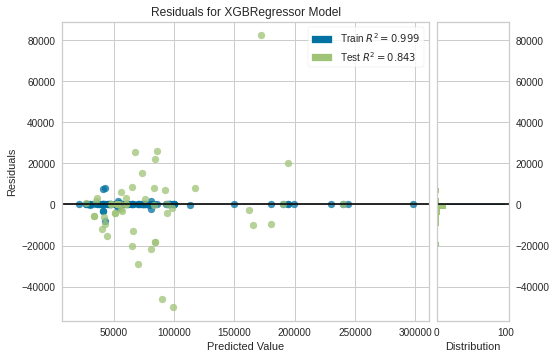

In [80]:
# Residuals Plot - the distances(error) between the actual and predicted values
plot_model(xgboost, plot='residuals')

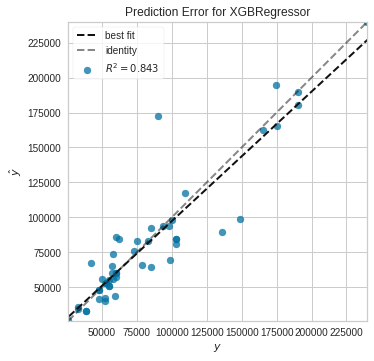

In [81]:
# Plotting the Prediction Error
plot_model(xgboost, plot='error')

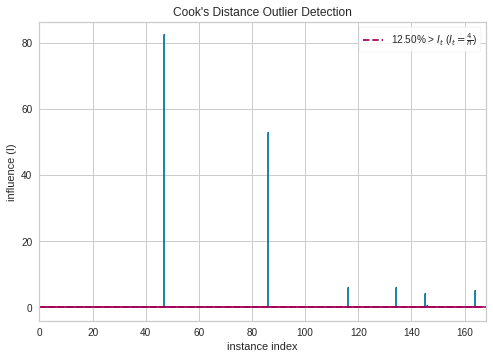

In [92]:
# Cooks Distance Plot
plot_model(xgboost, plot='cooks')

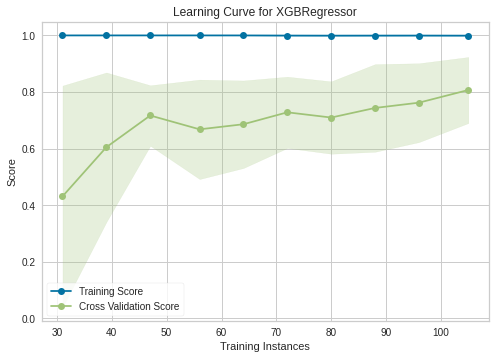

In [82]:
# Learning Curve
plot_model(xgboost, plot='learning')

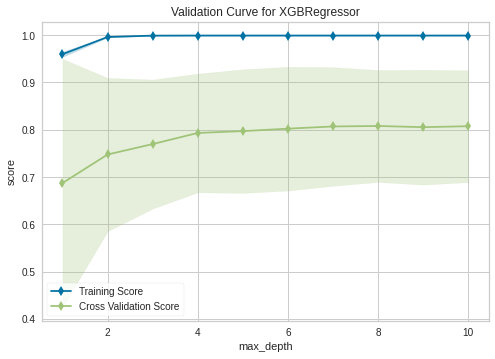

In [83]:
# Validation Curve
plot_model(xgboost, plot='vc')

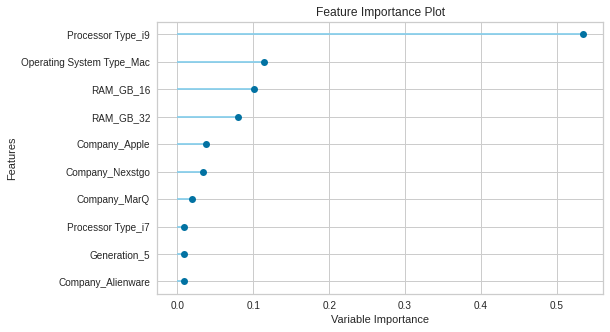

In [84]:
# Plot of Feature Importance
plot_model(xgboost, plot='feature')

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [87]:
# FinalXGBoost parameters for deployment
final_xgboost = finalize_model(xgboost)

In [111]:
final_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=100, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=8764,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=0)

In [88]:
new_predictions = predict_model(xgboost, data=X_test)
new_predictions.head() # Making the predictions

,RAM_GB,DDR_Version,Processor Name,Processor Type,Generation,Operating System Type,Storage_GB,Disk Drive,Size(Inches),Company,Graphic Card,Touchscreen,Label
0,8,4,Intel,i5,8,Windows,512,SSD,14.0,Asus,Yes,No,55989.992188
1,4,4,Intel,i3,10,Windows,1000,HDD,15.6,HP,No,No,39988.355469
2,8,3,Intel,i5,10,Windows,512,SSD,14.0,Asus,Yes,Yes,99990.023438
3,8,4,Intel,i5,8,Windows,512,SSD,13.3,Lenovo,No,No,83457.984375
4,8,4,Intel,i5,8,Windows,512,SSD,14.0,Acer,Yes,No,54989.996094


In [112]:
# save transformation pipeline and model 
save_model(xgboost, model_name = 'deployment_08082020')

Transformation Pipeline and Model Succesfully Saved


In [113]:
deployment_08082020 = load_model('deployment_08082020')

Transformation Pipeline and Model Sucessfully Loaded
[09:51:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
deployment_08082020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_i...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Price')),
                 ('f